## For Dataset data_3_2.csv

In [ ]:
# load data
import numpy as np
import pandas as pd

data = pd.read_csv('D:\Machine Learning TP year 3 s2\data_3_2.csv')
data.head()

,x1,x2,class
0,10.52,0.65,3
1,1.46,-1.25,2
2,1.50,0.56,2
3,-1.36,2.50,0
4,11.16,5.19,1


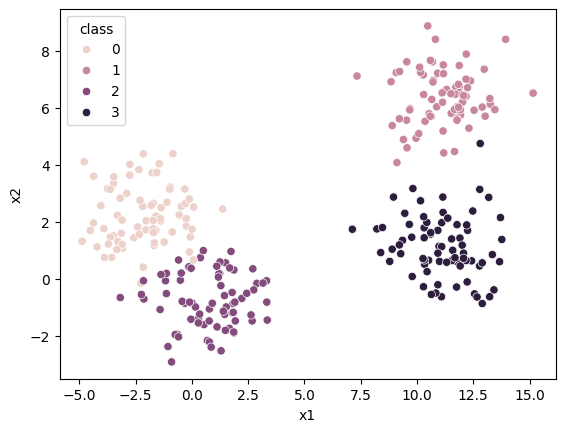

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=data, x=data['x1'], y=data['x2'], hue=data['class'])
plt.show()

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

# separate X and y
data_arr = data.to_numpy()
X = data_arr[:, :-1]
y = data_arr[:, -1]

# scale X
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# convert array to tensor
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.long)

In [ ]:
# build model
def my_model(X, w1, b1, w2, b2, w3, b3):
  # layer 1
  z1 = torch.matmul(X, w1) + b1
  a1 = torch.sigmoid(z1)

  # layer 2
  z2 = torch.matmul(a1, w2) + b2
  a2 = torch.sigmoid(z2)

  # output layer
  output = torch.matmul(a2, w3) + b3

  return output

In [ ]:
# training

# initialize parameters
w1 = torch.randn((2, 5), requires_grad=True) # 10 parameters
b1 = torch.randn((1, 5), requires_grad=True) # 5 parameters
w2 = torch.randn((5, 5), requires_grad=True) # 25 parameters
b2 = torch.randn((1, 5), requires_grad=True) # 5 parameters
w3 = torch.randn((5, 4), requires_grad=True) # 5 parameters
b3 = torch.randn((1, 4), requires_grad=True)	# 1 parameters

cost_function = nn.CrossEntropyLoss()
lr = 1
epochs = 1000
optimizer = optim.SGD([w1, b1, w2, b2, w3, b3], lr=1)

for epoch in range(epochs):
  # forward pass
  output = my_model(X_tensor, w1, b1, w2, b2, w3, b3)

  # compute cost
  cost = cost_function(output, y_tensor)

  # computer derivates
  cost.backward()

  # update parameters
  optimizer.step()

  # zero derivates
  optimizer.zero_grad()

  print(f'Epoch {epoch+1:03d}: Cost {cost.item():.4f}')

Epoch 001: Cost 2.0140
Epoch 002: Cost 1.4971
Epoch 003: Cost 1.3897
Epoch 004: Cost 1.3778
Epoch 005: Cost 1.3717
Epoch 006: Cost 1.3658
Epoch 007: Cost 1.3598
Epoch 008: Cost 1.3539
Epoch 009: Cost 1.3479
Epoch 010: Cost 1.3417
Epoch 011: Cost 1.3353
Epoch 012: Cost 1.3287
Epoch 013: Cost 1.3219
Epoch 014: Cost 1.3147
Epoch 015: Cost 1.3072
Epoch 016: Cost 1.2993
Epoch 017: Cost 1.2910
Epoch 018: Cost 1.2822
Epoch 019: Cost 1.2729
Epoch 020: Cost 1.2630
Epoch 021: Cost 1.2526
Epoch 022: Cost 1.2414
Epoch 023: Cost 1.2296
Epoch 024: Cost 1.2170
Epoch 025: Cost 1.2037
Epoch 026: Cost 1.1895
Epoch 027: Cost 1.1744
Epoch 028: Cost 1.1584
Epoch 029: Cost 1.1415
Epoch 030: Cost 1.1237
Epoch 031: Cost 1.1050
Epoch 032: Cost 1.0853
Epoch 033: Cost 1.0648
Epoch 034: Cost 1.0435
Epoch 035: Cost 1.0214
Epoch 036: Cost 0.9986
Epoch 037: Cost 0.9754
Epoch 038: Cost 0.9517
Epoch 039: Cost 0.9277
Epoch 040: Cost 0.9037
Epoch 041: Cost 0.8796
Epoch 042: Cost 0.8557
Epoch 043: Cost 0.8322
Epoch 044: 

In [ ]:
# evaluate the model
output = my_model(X_tensor, w1, b1, w2, b2, w3, b3)
y_hat = torch.argmax(output, dim=1)

accuracy = y_hat == y_tensor
print(f'Accuracy: {accuracy.sum().item() / len(accuracy):.2f} %')

Accuracy: 0.99 %
